In [1]:
import numpy as np
from matplotlib import pyplot as plt   
import matplotlib.pyplot as plt
import pandas as pd
import math
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
import cv2
plt.style.use(astropy_mpl_style)
#plt.style.use("default")
#import sys
#sys.path.append('/Users/shaivi/mypy/')
import tvg
from matplotlib import pyplot, image, transforms
from scipy import ndimage
import skimage

from scipy import ndimage
import matplotlib.pyplot as plt

In [2]:
conti = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_conti_index.fits')
magincl = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_magincl_index.fits')
magfield = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_magfield_index.fits')
dopp = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_dopp1_index.fits')

num_scans = 59
dim = conti[1].data.shape
data_conti = np.zeros((dim[0], dim[1], num_scans))
data_magincl = np.zeros((dim[0], dim[1], num_scans))
data_Bz = np.zeros((dim[0], dim[1], num_scans))
#data_dopp = np.zeros((dim[0], dim[1], num_scans))

for i in range(num_scans):
    data_conti_temp = conti[i+1].data
    #data_conti_2=(data_conti_temp - data_conti_temp.min())*(255.0/(data_conti_temp - data_conti_temp.min()).max())
    #data_conti[:,:,i] = data_conti_2
    data_conti[:,:,i] = data_conti_temp
    np.save('/Users/shaivi/Downloads/test_conti.npy', data_conti)
   
    data_magincl_temp = magincl[i+1].data
    #data_magincl_2=(data_magincl_temp - data_magincl_temp.min())*(255.0/(data_magincl_temp - data_magincl_temp.min()).max())
    #data_magincl[:,:,i] = data_magincl_2
    data_magincl[:,:,i] = data_magincl_temp
    np.save('/Users/shaivi/Downloads/test_magincl.npy', data_magincl)

    data_magfield_temp = magfield[i+1].data
    Bz_temp =  data_magfield_temp*(np.cos(np.array(np.deg2rad(data_magincl_temp))))
    #data_Bz_2=(Bz_temp - Bz_temp.min())*(255.0/(Bz_temp - Bz_temp.min()).max())
    #data_Bz[:,:,i] = data_Bz_2
    data_Bz[:,:,i] = Bz_temp
    
    np.save('/Users/shaivi/Downloads/test_Bz.npy', data_Bz)
    
    #data_dopp_temp = dopp[i+1].data
    #data_dopp_2=(data_dopp_temp - data_dopp_temp.min())*(255.0/(data_dopp_temp - data_dopp_temp.min()).max())
    #data_dopp[:,:,i] = data_dopp_2
    #np.save('/Users/shaivi/Downloads/test_dopp1.npy', data_dopp)
    
dim = data_Bz.shape
alltogether = np.zeros((dim[0], dim[1]*3, dim[2]))
j = 0; alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_conti
j = 1 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_magincl
j = 2 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_Bz
#j = 3 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_dopp

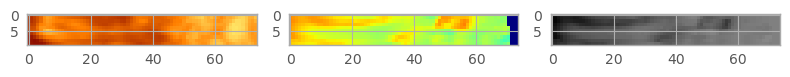

In [32]:
dc_rot = ndimage.rotate(data_conti, 0, reshape=False)
mi_rot = ndimage.rotate(data_magincl, 5, reshape=False)
bz_rot = ndimage.rotate(data_Bz, 5, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[150:160,46:,10], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[151:161,46:,10], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[151:161,46:,10], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

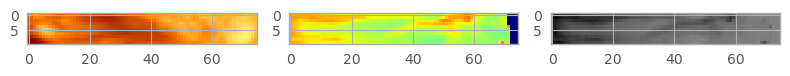

In [30]:
dc_rot = ndimage.rotate(data_conti, 0, reshape=False)
mi_rot = ndimage.rotate(data_magincl, 5, reshape=False)
bz_rot = ndimage.rotate(data_Bz, 5, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[149:159,45:,11], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[151:161,45:,11], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[151:161,45:,11], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

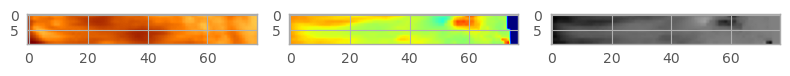

In [59]:
dc_rot = ndimage.rotate(data_conti, 0, reshape=False)
mi_rot = ndimage.rotate(data_magincl, 5, reshape=False)
bz_rot = ndimage.rotate(data_Bz, 5, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[148:158,43:,12], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[150:160,43:,12], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[150:160,43:,12], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

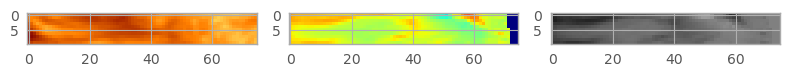

In [58]:
dc_rot = ndimage.rotate(data_conti,-5, reshape=False)
mi_rot = ndimage.rotate(data_magincl, 5, reshape=False)
bz_rot = ndimage.rotate(data_Bz, 5, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[149:159,45:,13], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[150:160,45:,13], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[150:160,45:,13], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

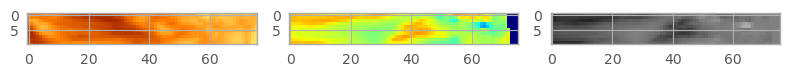

In [56]:
dc_rot = ndimage.rotate(data_conti,-5, reshape=False)
mi_rot = ndimage.rotate(data_magincl, 5, reshape=False)
bz_rot = ndimage.rotate(data_Bz, 5, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[149:159,44:,14], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[150:160,44:,14], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[150:160,44:,14], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

In [67]:
#continuum intensity #new update! you have to include each rotation when tracking or the values will be so weird
dc_rot = ndimage.rotate(data_conti,-5, reshape=False)
dc_rot[149:159,44:,14][5][0:50]

array([ 8852.8439293 ,  9627.23254008, 10753.30555504, 12142.53256736,
       13098.34940455, 13302.60420455, 13043.84108332, 12602.85719633,
       12202.38600751, 11837.67396345, 11437.30570899, 11232.75051589,
       11071.27877968, 11096.36329297, 11104.85022574, 10930.06161903,
       10704.36777956, 10560.30362991, 10416.63809914, 10380.97055933,
       10359.38004881, 10265.18832197, 10075.62357399,  9952.53617154,
        9758.34555236,  9562.58093609,  9385.98291388,  9187.20693901,
        9069.88022056,  8852.73747594,  8793.92804174,  8935.38402401,
        9118.44392431,  9102.11184028,  9178.78685637,  9432.17071169,
        9715.21507443, 10020.71181555, 10470.33985873, 10789.15352766,
       10809.9564453 , 10946.30176513, 11626.5066132 , 12607.23821325,
       13229.9993592 , 13168.17780535, 12852.0499495 , 12519.12570644,
       12074.52422718, 11658.3719194 ])

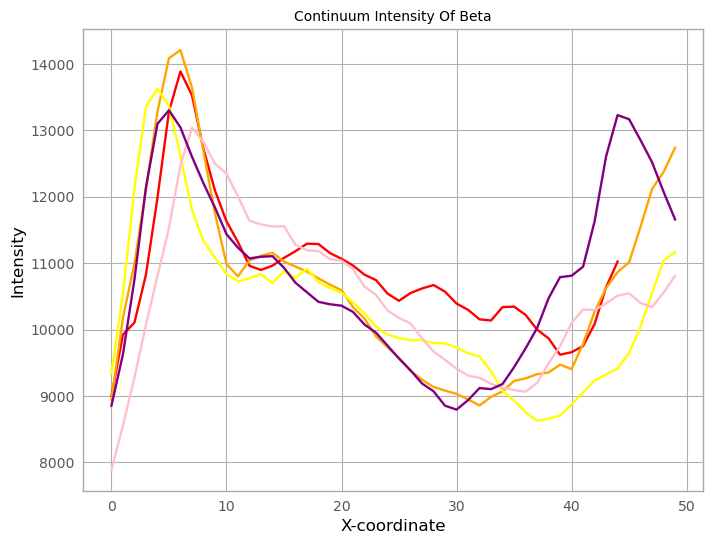

In [68]:
#vertical index [5]
dc_y0 = np.array([ 8996.        ,  9923.81835938, 10103.81835938, 10827.27246094,
       11983.09082031, 13284.54589844, 13888.        , 13528.18164063,
       12721.27246094, 12093.81835938, 11630.72753906, 11317.09082031,
       10959.63671875, 10897.27246094, 10962.36328125, 11079.27246094,
       11180.18164063, 11293.09082031, 11287.63671875, 11151.63671875,
       11065.63671875, 10964.18164063, 10826.18164062, 10744.90917969,
       10541.81835938, 10432.18164062, 10550.        , 10618.18164062,
       10670.36328125, 10570.        , 10391.45410156, 10296.36328125,
       10153.45410156, 10136.        , 10338.18164062, 10345.27246094,
       10220.90917969,  9999.27246094,  9867.63671875,  9620.90917969,
        9658.        ,  9751.81835938, 10081.63671875, 10634.54589844,
       11023.09082031])
dc_x0 = range(0,45)

#vertical index [5]
dc_y1 = np.array([ 8946.36328125, 10175.27246094, 10995.09082031, 12114.18164063,
       13280.54589844, 14087.09082031, 14208.90917969, 13643.81835938,
       12683.63671875, 11749.81835938, 10986.90917969, 10800.72753906,
       11041.27246094, 11109.27246094, 11155.63671875, 11023.63671875,
       10948.        , 10872.18164062, 10768.72753906, 10675.81835938,
       10591.81835938, 10335.81835938, 10165.27246094,  9897.81835938,
        9732.36328125,  9572.18164063,  9376.54589844,  9244.        ,
        9135.45410156,  9079.63671875,  9031.27246094,  8947.09082031,
        8856.        ,  8985.81835938,  9068.90917969,  9225.09082031,
        9264.54589844,  9326.72753906,  9352.90917969,  9470.90917969,
        9402.90917969,  9782.72753906, 10268.        , 10624.18164063,
       10864.36328125, 11012.        , 11549.81835938, 12116.72753906,
       12373.45410156, 12737.81835938])
dc_x1 = range(0,50)

#vertical index [5]
dc_y2 = np.array([ 9345.27246094, 10544.72753906, 12119.09082031, 13356.18164063,
       13626.90917969, 13369.45410156, 12615.81835938, 11802.18164063,
       11335.45410156, 11082.36328125, 10837.45410156, 10724.54589844,
       10772.54589844, 10832.54589844, 10703.09082031, 10880.36328125,
       10777.81835938, 10915.81835938, 10711.45410156, 10627.63671875,
       10552.90917969, 10408.18164063, 10245.63671875, 10042.18164062,
        9923.45410156,  9873.09082031,  9840.72753906,  9837.45410156,
        9797.45410156,  9790.72753906,  9731.81835938,  9642.        ,
        9596.18164063,  9371.27246094,  9074.36328125,  8930.18164062,
        8752.36328125,  8625.63671875,  8656.36328125,  8706.        ,
        8870.72753906,  9051.63671875,  9234.36328125,  9320.36328125,
        9411.81835938,  9647.81835938, 10044.18164063, 10551.81835938,
       11036.90917969, 11168.        ])
dc_x2 = range(0,50)

#vertical index [5]
dc_y3 = np.array([ 7882.4204171 ,  8555.14870236,  9277.50076192, 10072.47129242,
       10805.03521677, 11529.74306375, 12476.41882876, 13038.0142721 ,
       12827.70810466, 12496.23931055, 12347.55977127, 12005.29674993,
       11638.99374722, 11581.50541677, 11551.5129622 , 11557.54446689,
       11275.58103331, 11194.304174  , 11181.27756524, 11058.51170698,
       11038.91693262, 10908.17790147, 10645.01554313, 10521.43159586,
       10287.04180242, 10173.44500519, 10094.0055623 ,  9865.16477212,
        9669.3757389 ,  9542.45971086,  9411.87556931,  9304.92561522,
        9273.0795337 ,  9182.58588437,  9121.43715622,  9088.9137031 ,
        9063.14575761,  9196.64541908,  9491.06745595,  9748.38766918,
       10100.123882  , 10300.43489567, 10294.98934779, 10392.73407809,
       10510.72851499, 10545.16186324, 10400.23478592, 10337.34526716,
       10557.08178057, 10808.8667008 ])
dc_x3 = range(0,50)

#vertical index[5]
dc_y4 = np.array([ 8852.8439293 ,  9627.23254008, 10753.30555504, 12142.53256736,
       13098.34940455, 13302.60420455, 13043.84108332, 12602.85719633,
       12202.38600751, 11837.67396345, 11437.30570899, 11232.75051589,
       11071.27877968, 11096.36329297, 11104.85022574, 10930.06161903,
       10704.36777956, 10560.30362991, 10416.63809914, 10380.97055933,
       10359.38004881, 10265.18832197, 10075.62357399,  9952.53617154,
        9758.34555236,  9562.58093609,  9385.98291388,  9187.20693901,
        9069.88022056,  8852.73747594,  8793.92804174,  8935.38402401,
        9118.44392431,  9102.11184028,  9178.78685637,  9432.17071169,
        9715.21507443, 10020.71181555, 10470.33985873, 10789.15352766,
       10809.9564453 , 10946.30176513, 11626.5066132 , 12607.23821325,
       13229.9993592 , 13168.17780535, 12852.0499495 , 12519.12570644,
       12074.52422718, 11658.3719194 ])
dc_x4 = range(0,50)

plt.title("Continuum Intensity Of Beta")
plt.xlabel("X-coordinate")
plt.ylabel("Intensity")
plt.plot(dc_x0,dc_y0, color="red")
plt.plot(dc_x1,dc_y1, color="orange")
plt.plot(dc_x2,dc_y2, color="yellow")
plt.plot(dc_x3,dc_y3, color="pink")
plt.plot(dc_x4,dc_y4, color="purple")

plt.show()

In [74]:
##magnetic inclinaton
mi_rot = ndimage.rotate(data_magincl, 5, reshape=False)
mi_rot[150:160,44:,14][5][0:50]

array([117.04276077, 113.95978633, 112.99144864, 111.89656108,
       110.92755384, 112.1897509 , 111.40452613, 111.14376374,
       110.21927199, 110.20911078, 109.2325862 , 108.65331577,
       108.74576287, 107.49798945, 106.16266121, 105.04884787,
       103.7066323 , 103.22155531, 102.52704214, 101.51397912,
       101.20433564,  99.22333689,  98.08565678,  97.25742963,
        96.14951344,  94.97597995,  94.0833665 ,  92.58993583,
        91.44641089,  91.09172041,  92.10527474,  92.94621481,
        93.40408325,  94.10970991,  98.0819022 , 104.76881997,
       111.22375973, 120.81635409, 125.89814708, 124.89888418,
       130.6528716 , 128.13214829, 129.7826795 , 131.59978822,
       129.87769545, 130.49354129, 127.33578123, 121.53769137,
       117.67089166, 113.68265901])

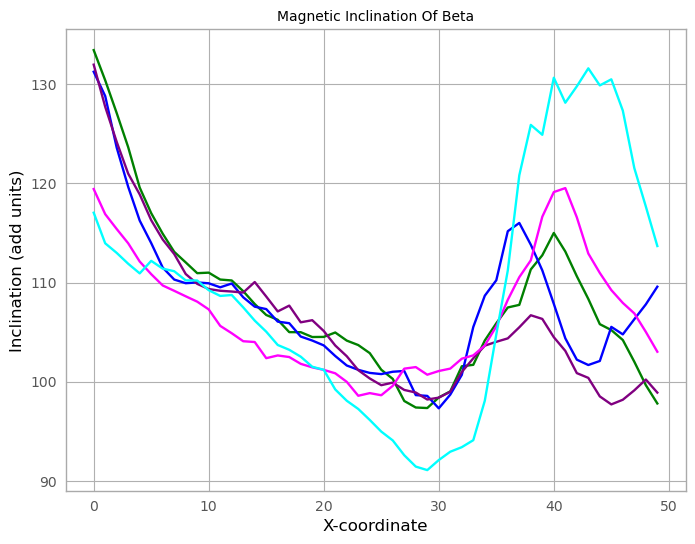

In [75]:
#vertical index [5]
mi_y0 = np.array([133.43728321, 130.39528864, 127.09037964, 123.64446172,
       119.57677868, 116.99831443, 114.92531333, 113.09983426,
       112.03279482, 110.94772278, 111.00059863, 110.3049662 ,
       110.21246992, 109.13065462, 107.8364622 , 106.73197238,
       106.2478125 , 105.0018069 , 104.99689158, 104.51029556,
       104.52205479, 104.96674254, 104.14958842, 103.69957645,
       102.88594258, 101.21121601, 100.2881174 ,  98.06020518,
        97.40433524,  97.3496335 ,  98.41452968,  99.03137728,
       101.55945097, 101.70788859, 104.15736021, 105.89343676,
       107.48896692, 107.75214623, 111.32419949, 112.75396061,
       115.00152366, 113.13058373, 110.64044784, 108.34891919,
       105.80683805, 105.21043952, 104.20806332, 102.01396663,
        99.65953237,  97.81009468])
mi_x0 = range(0,50)

#vertical index [5]
mi_y1 = np.array([131.25477948, 128.80584127, 123.60644707, 119.65162818,
       116.25063502, 113.97964974, 111.51183848, 110.30432226,
       109.93516165, 110.01337719, 109.92702871, 109.52269773,
       109.90584847, 108.51521648, 107.56928903, 107.3268612 ,
       106.06159056, 105.9027054 , 104.55797604, 104.15586908,
       103.66512746, 102.59672957, 101.64024481, 101.20301603,
       100.89143377, 100.77237794, 101.00917636, 101.08596191,
        98.65332698,  98.57476995,  97.32129607,  98.70267148,
       100.69261572, 105.52305962, 108.67340481, 110.2328505 ,
       115.17880281, 116.01231029, 113.81831721, 111.22958008,
       107.85522656, 104.38092261, 102.22832584, 101.68751361,
       102.09608046, 105.53287724, 104.77730603, 106.30573058,
       107.80136789, 109.58371437])
mi_x1 = range(0,50)

#vertical index [5]
mi_y2 = np.array([131.97180248, 127.72412587, 124.18514286, 120.97918798,
       118.88884108, 116.28777708, 114.34136068, 112.87920259,
       110.86229809, 109.87082981, 109.34817866, 109.17461279,
       109.09732927, 108.9932757 , 110.05385784, 108.59170991,
       107.09123061, 107.67637117, 105.99252821, 106.20517664,
       105.11752189, 103.65404459, 102.57414415, 101.16700041,
       100.33081108,  99.65349028,  99.91330913,  99.17460786,
        98.91372522,  98.20946566,  98.3972356 ,  98.99283226,
       100.98503281, 102.36556052, 103.63700514, 104.02873329,
       104.37327695, 105.4915675 , 106.70547708, 106.33481648,
       104.49325776, 103.11287477, 100.87149055, 100.39085333,
        98.52215573,  97.71589783,  98.18699729,  99.13514361,
       100.2243787 ,  98.90638411])
mi_x2 = range(0,50)

#vertical index [5]
mi_y3 = np.array([119.42905049, 116.89958349, 115.39978258, 113.95937221,
       112.12111143, 110.84766979, 109.70846656, 109.16961861,
       108.61593781, 108.07494267, 107.29398613, 105.63420274,
       104.89141486, 104.08608979, 104.0051525 , 102.37740032,
       102.65205453, 102.4917376 , 101.80620058, 101.45389024,
       101.19533016, 100.852828  ,  99.99113145,  98.58810909,
        98.85453264,  98.64045532,  99.59099605, 101.32172507,
       101.47931934, 100.7107594 , 101.0821793 , 101.32713247,
       102.32528143, 102.66087704, 103.65684858, 105.58234952,
       108.25998034, 110.54356867, 112.24451663, 116.63831707,
       119.12444361, 119.52601593, 116.58237017, 112.92811271,
       110.97016945, 109.24157589, 107.94829172, 106.89203259,
       105.02933988, 103.02588403])
mi_x3 = range(0,50)

#vertical index [5]
mi_y4 = np.array([117.04276077, 113.95978633, 112.99144864, 111.89656108,
       110.92755384, 112.1897509 , 111.40452613, 111.14376374,
       110.21927199, 110.20911078, 109.2325862 , 108.65331577,
       108.74576287, 107.49798945, 106.16266121, 105.04884787,
       103.7066323 , 103.22155531, 102.52704214, 101.51397912,
       101.20433564,  99.22333689,  98.08565678,  97.25742963,
        96.14951344,  94.97597995,  94.0833665 ,  92.58993583,
        91.44641089,  91.09172041,  92.10527474,  92.94621481,
        93.40408325,  94.10970991,  98.0819022 , 104.76881997,
       111.22375973, 120.81635409, 125.89814708, 124.89888418,
       130.6528716 , 128.13214829, 129.7826795 , 131.59978822,
       129.87769545, 130.49354129, 127.33578123, 121.53769137,
       117.67089166, 113.68265901])
mi_x4 = range(0,50)

plt.title("Magnetic Inclination Of Beta")
plt.xlabel("X-coordinate")
plt.ylabel("Inclination (add units)")
plt.plot(mi_x0,mi_y0, color="green")
plt.plot(mi_x1,mi_y1, color="blue")
plt.plot(mi_x2,mi_y2, color="purple")
plt.plot(mi_x3,mi_y3, color="magenta")
plt.plot(mi_x4,mi_y4, color="cyan")

plt.show()

In [80]:
#Bz plots
bz_rot = ndimage.rotate(data_Bz, 5, reshape=False)
bz_rot[150:160,44:,14][5][0:50]

array([-540.22922981, -463.75142144, -426.47960183, -386.31520495,
       -364.93591974, -393.10186011, -364.65500827, -368.72244121,
       -376.02307617, -372.28601907, -361.63060666, -375.2876763 ,
       -364.93673757, -347.8200363 , -327.55233273, -291.00852475,
       -270.11339025, -255.52501277, -235.58252208, -215.68854849,
       -202.94139929, -172.00099063, -147.61413977, -129.81730111,
       -108.48786125,  -86.10359284,  -71.50124675,  -48.21848894,
        -24.96673294,  -18.08052304,  -36.66917792,  -50.51929532,
        -41.66224176,  -52.38547588,  -83.41105572, -138.40671784,
       -195.75876988, -377.27827001, -436.33566391, -440.34798323,
       -573.96979057, -545.72547316, -602.07958737, -631.35218213,
       -594.3041512 , -663.05367093, -616.61285974, -469.44431267,
       -371.72187828, -282.84587744])

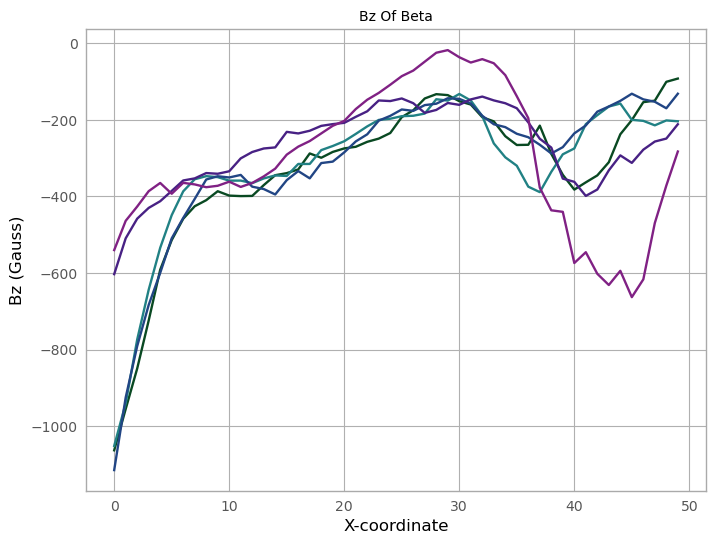

In [81]:
#vertical index [5]
bz_y0 = np.array([-1062.97850212,  -955.02422012,  -849.33575668,  -723.82896134,
        -591.45525071,  -514.10970914,  -458.43998153,  -425.73646788,
        -409.8813709 ,  -386.50347858,  -397.93258278,  -399.21142   ,
        -398.73812799,  -370.6214339 ,  -344.68055807,  -339.28404495,
        -329.61569836,  -287.87448938,  -299.11390221,  -283.90885668,
        -274.71238239,  -270.50293598,  -257.52634225,  -249.13584631,
        -234.54463677,  -193.08027577,  -175.1780884 ,  -144.3430284 ,
        -133.08651209,  -135.59289658,  -151.39765973,  -160.17707883,
        -193.24998138,  -204.1329324 ,  -242.84393122,  -265.82890459,
        -265.22660612,  -215.27508219,  -289.08092722,  -343.65820023,
        -382.30503345,  -363.3493155 ,  -345.22443832,  -310.85320123,
        -237.80984283,  -200.76651874,  -153.96571537,  -150.0492468 ,
        -100.83721752,   -92.38214559])
bz_x0 = range(0,50)

#vertical index [5]
bz_y1 = np.array([-1051.49851498,  -940.22941548,  -773.70165229,  -643.58845403,
        -534.18517356,  -448.99056152,  -386.79230538,  -355.28693008,
        -347.16217389,  -349.73389222,  -358.92470878,  -358.75207471,
        -365.41732708,  -353.11083866,  -345.27443798,  -346.67253808,
        -315.33547569,  -315.30968416,  -279.18644302,  -268.44809425,
        -255.99931763,  -236.92816266,  -217.1694316 ,  -200.37539927,
        -197.24622999,  -190.59776466,  -189.46697196,  -183.77795673,
        -146.33875745,  -149.89941014,  -132.57276488,  -149.64839502,
        -190.44960426,  -261.64538707,  -297.96462858,  -319.94634949,
        -374.59753694,  -388.86166387,  -335.84705673,  -290.1171934 ,
        -274.81247359,  -211.40419479,  -187.90821832,  -165.42889569,
        -157.59067248,  -200.10439778,  -202.80250755,  -214.45992946,
        -201.67635063,  -203.87464013])
bz_x1 = range(0,50)

#vertical index [5]
bz_y2 = np.array([-1114.64086811,  -924.90026333,  -790.98439122,  -683.33163591,
        -599.6433416 ,  -509.51556008,  -456.2951308 ,  -406.61992633,
        -355.92517305,  -347.42936094,  -350.59588155,  -343.95737251,
        -374.63039818,  -380.82692683,  -394.94736326,  -357.64164309,
        -333.89536604,  -352.89341346,  -312.98312609,  -309.23363746,
        -285.03086255,  -256.51142271,  -237.89483895,  -202.22468768,
        -189.73494766,  -173.07617919,  -176.74053165,  -161.66567191,
        -158.02238327,  -143.76721514,  -145.29667285,  -157.51144141,
        -189.62629517,  -211.64184763,  -219.15631036,  -236.49897021,
        -245.56723521,  -265.20534927,  -287.95883299,  -271.46351566,
        -235.468178  ,  -214.79788374,  -178.78741945,  -165.29161552,
        -150.58765473,  -131.91346971,  -146.67522187,  -152.94873819,
        -169.92644666,  -131.94979819])
bz_x2 = range(0,50)

#vertical index [5]
bz_y3 = np.array([-603.08751221, -509.4121194 , -458.12868472, -430.03170972,
       -412.58599928, -385.6935234 , -358.44683828, -352.99864281,
       -339.10496876, -340.90788789, -334.42322982, -300.73448312,
       -284.12721173, -274.93179115, -272.10855685, -231.52956365,
       -235.62623867, -228.62234315, -215.87598755, -211.3102315 ,
       -207.98652067, -192.33020356, -177.78806969, -149.56565896,
       -151.11302836, -144.31664714, -156.69187726, -181.98435398,
       -174.26268059, -156.12726409, -160.99495643, -146.7810926 ,
       -139.41339808, -149.36907695, -156.77680459, -169.84551134,
       -206.80388626, -249.55473165, -272.5407496 , -353.57691773,
       -361.98582795, -398.74165991, -382.06804915, -331.99766509,
       -292.92909405, -312.49954136, -278.01302895, -256.80171361,
       -249.04455089, -211.65262168])
bz_x3 = range(0,50)
                  
#vertical index [5]
bz_y4 = np.array([-540.22922981, -463.75142144, -426.47960183, -386.31520495,
       -364.93591974, -393.10186011, -364.65500827, -368.72244121,
       -376.02307617, -372.28601907, -361.63060666, -375.2876763 ,
       -364.93673757, -347.8200363 , -327.55233273, -291.00852475,
       -270.11339025, -255.52501277, -235.58252208, -215.68854849,
       -202.94139929, -172.00099063, -147.61413977, -129.81730111,
       -108.48786125,  -86.10359284,  -71.50124675,  -48.21848894,
        -24.96673294,  -18.08052304,  -36.66917792,  -50.51929532,
        -41.66224176,  -52.38547588,  -83.41105572, -138.40671784,
       -195.75876988, -377.27827001, -436.33566391, -440.34798323,
       -573.96979057, -545.72547316, -602.07958737, -631.35218213,
       -594.3041512 , -663.05367093, -616.61285974, -469.44431267,
       -371.72187828, -282.84587744])
bz_x4 = range(0,50)
                  
plt.title("Bz Of Beta")
plt.xlabel("X-coordinate")
plt.ylabel("Bz (Gauss)")
plt.plot(bz_x0,bz_y0, color="#094922")
plt.plot(bz_x1,bz_y1, color="#218184")
plt.plot(bz_x2,bz_y2, color="#214584")
plt.plot(bz_x3,bz_y3, color="#482184")
plt.plot(bz_x4,bz_y4, color="#802184")

plt.show()